In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sp500_sector = pd.read_csv('C:/Users/cswoo/data/sp500_sectors.csv')
sp500 = pd.read_csv('C:/Users/cswoo/data/sp500_data.csv', index_col=0)

In [3]:
sp500_sector

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH
...,...,...,...,...
512,health_care,Health Care,biotechnology,CELG
513,health_care,Health Care,biotechnology,GILD
514,health_care,Health Care,biotechnology,REGN
515,health_care,Health Care,biotechnology,VRTX


In [4]:
# 일간 수익
sp500

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.000000,0.060124,-0.022100,0.000000,0.000000,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.000000,0.000000,0.347160,0.000000,0.041670,0.000000,0.015564,1.750000,0.125000,0.000000
1993-02-01,0.000000,-0.180389,0.027621,0.000000,0.000000,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.000000,0.000000,-0.231440,0.000000,0.000000,-0.010410,0.007782,1.250000,0.125000,0.000000
1993-02-02,0.000000,-0.120257,0.035900,0.000000,0.000000,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.000000,0.000000,-0.115720,0.000000,0.000000,0.000000,-0.007792,-0.250000,0.000000,0.000000
1993-02-03,0.000000,0.060124,-0.024857,0.000000,0.000000,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.000000,0.000000,-0.086790,0.000000,0.041670,-0.041670,-0.038919,-0.500000,0.062500,0.000000
1993-02-04,0.000000,-0.360770,-0.060757,0.000000,0.000000,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.000000,0.000000,0.144650,0.000000,-0.041660,-0.031260,-0.046711,0.000000,0.062500,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-06-25,0.019989,-0.529999,-0.379997,0.080002,0.350003,-0.580002,-0.457999,-1.720001,-0.009936,0.039997,...,-2.500000,1.889999,-2.060012,0.150002,-1.630004,-0.990005,-2.250000,1.270019,-1.919998,-0.080002
2015-06-26,-1.299988,-0.330000,-0.390004,-1.820000,0.190003,0.330002,-0.328565,-0.769989,0.020000,0.000000,...,-0.070007,-2.380005,-1.390000,0.550004,-3.509979,-1.080002,-0.800003,-1.900024,-3.629997,0.440002
2015-06-29,-10.299988,-0.410000,-0.670002,-1.250000,-1.919998,-0.510002,-0.139999,-0.949997,-0.100000,-0.040001,...,-2.250000,-5.490005,-5.029999,0.090000,-8.290009,-1.209999,-2.419998,-9.620026,-3.770004,-2.479996
2015-06-30,-2.109986,-0.049999,-0.559997,-0.099999,-0.689999,-0.610001,0.239999,-1.330001,-0.200000,0.020001,...,-0.299988,0.270004,0.279999,-1.710001,0.390014,0.439995,-0.209999,-2.070007,-0.849999,-1.360001


In [5]:
# T, CTL, FTR, VZ, LVLT사의 주식의 일간 수익 사이의 상관 행렬
telecomSymbols = sp500_sector[sp500_sector['sector'] == 'telecommunications_services']['symbol']
telecom = sp500.loc[sp500.index >= '2012-07-01', telecomSymbols]
telecom.corr(method='pearson')

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.474683,0.327767,0.677612,0.278626
CTL,0.474683,1.000000,0.419757,0.416604,0.286665
FTR,0.327767,0.419757,1.000000,0.287386,0.260068
VZ,0.677612,0.416604,0.287386,1.000000,0.242199
LVLT,0.278626,0.286665,0.260068,0.242199,1.000000


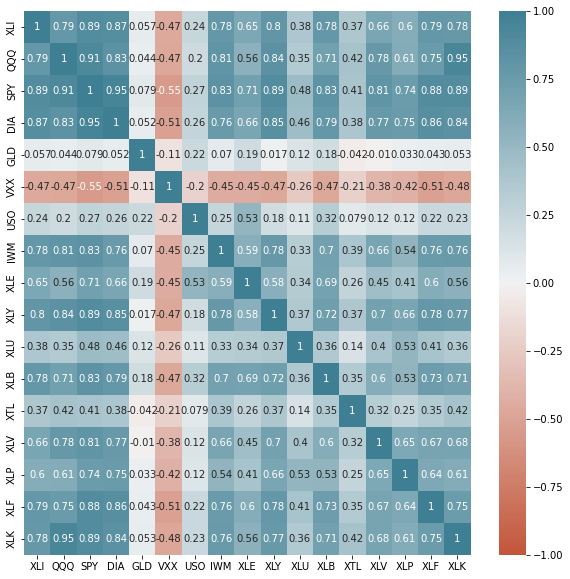

In [6]:
# sector = 'etf' 사이의 상관관계 히트맵
etfs = sp500.loc[sp500.index >= '2012-07-01', sp500_sector[sp500_sector['sector']=='etf']['symbol']]

fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(etfs.corr(method='pearson'), vmin=-1, vmax=1,
                cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

plt.show()

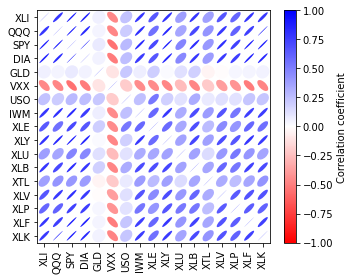

In [7]:
# 상관관계 방향성 시각화
from matplotlib.collections import EllipseCollection
from matplotlib.colors import Normalize

def plot_corr_ellipses(data, figsize=None, **kwargs):
    M = np.array(data)
    if not M.ndim == 2:
        raise ValueError('data must be a 2D array')
    fig, ax = plt.subplots(1, 1, figsize=figsize, subplot_kw={'aspect':'equal'})
    ax.set_xlim(-0.5, M.shape[1] - 0.5)
    ax.set_ylim(-0.5, M.shape[0] - 0.5)
    ax.invert_yaxis()

    # xy locations of each ellipse center
    xy = np.indices(M.shape)[::-1].reshape(2, -1).T

    # set the relative sizes of the major/minor axes according to the strength of
    # the positive/negative correlation
    w = np.ones_like(M).ravel() + 0.01
    h = 1 - np.abs(M).ravel() - 0.01
    a = 45 * np.sign(M).ravel()

    ec = EllipseCollection(widths=w, heights=h, angles=a, units='x', offsets=xy,
                           norm=Normalize(vmin=-1, vmax=1),
                           transOffset=ax.transData, array=M.ravel(), **kwargs)
    ax.add_collection(ec)

    # if data is a DataFrame, use the row/column names as tick labels
    if isinstance(data, pd.DataFrame):
        ax.set_xticks(np.arange(M.shape[1]))
        ax.set_xticklabels(data.columns, rotation=90)
        ax.set_yticks(np.arange(M.shape[0]))
        ax.set_yticklabels(data.index)

    return fig, ax, ec

fig, ax, ec = plot_corr_ellipses(etfs.corr(method='pearson'), figsize=(5, 4), cmap='bwr_r')
cb = fig.colorbar(ec)
cb.set_label('Correlation coefficient')

fig.tight_layout()

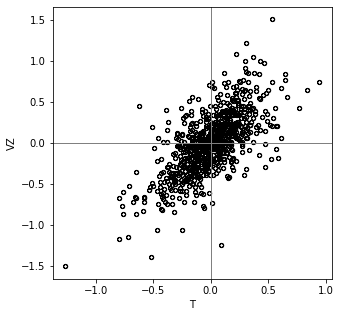

In [8]:
# 산점도(두 변수 사이의 관계를 시각화하는 가장 기본적인 방법)
ax = telecom.plot.scatter(x='T', y='VZ', figsize=(5, 5), marker='$\u25ef$', color='black')
ax.axhline(0, color='grey', linewidth=1)
ax.axvline(0, color='grey', linewidth=1)
plt.show()